Importing the necessary packages

In [229]:
# importing libraries
import pandas            as pd                       # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots


Importing the file

In [230]:
# specifying file name
file = "GOT_character_predictions.xlsx"

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# reading the file into Python
got = pd.read_excel ("GOT_character_predictions.xlsx")

# outputting the first ten rows of the dataset
got.head(n = 5)

S.No                  name                 title   culture  dateOfBirth              mother            father                heir           house               spouse  book1_A_Game_Of_Thrones  book2_A_Clash_Of_Kings  book3_A_Storm_Of_Swords  book4_A_Feast_For_Crows  book5_A_Dance_with_Dragons  isAliveMother  isAliveFather  isAliveHeir  isAliveSpouse  isMarried  isNoble   age  numDeadRelations  popularity  isAlive
0     1  Viserys II Targaryen                   NaN       NaN          NaN  Rhaenyra Targaryen  Daemon Targaryen  Aegon IV Targaryen             NaN                  NaN                        0                       0                        0                        0                           0            1.0            0.0          0.0            NaN          0        0   NaN                11    0.605351        0
1     2           Walder Frey  Lord of the Crossing  Rivermen        208.0                 NaN               NaN                 NaN      House Frey          Perra Royce                        1                       1                        1                        1                           1            NaN            NaN          NaN            1.0          1        1  97.0                 1    0.896321        1
2     3          Addison Hill                   Ser       NaN          NaN                 NaN               NaN                 NaN     House Swyft                  NaN                        0                       0                        0                        1                           0            NaN            NaN          NaN            NaN          0        1   NaN                 0    0.267559        1
3     4           Aemma Arryn                 Queen       NaN         82.0                 NaN               NaN                 NaN     House Arryn  Viserys I Targaryen                        0                       0                        0                        0                           0            NaN            NaN          NaN            0.0          1        1  23.0                 0    0.183946        0
4     5        Sylva Santagar            Greenstone   Dornish        276.0                 NaN               NaN                 NaN  House Santagar      Eldon Estermont                        0                       0                        0                        1                           0            NaN            NaN          NaN            1.0          1        1  29.0                 0    0.043478        1

Analyzing the data

Things to be done
1. Gender gussing
2. Categorize into male, female
3. Imputing age with information from other features
4. Develop a new feature to capture whether or not a passenger was under the age of 18.
5. Impute missing data with 'Unknown'.
6. Creating dummies for the features.
7. Dropping Additional Features
8. Storing the dataset changes as an Excel file.

In [231]:
#Extracting first name for gender gusser
got['first_name']= (got['name'].str.split(' ').str[0])
got.head()

S.No                  name                 title   culture  dateOfBirth              mother            father                heir           house               spouse  book1_A_Game_Of_Thrones  book2_A_Clash_Of_Kings  book3_A_Storm_Of_Swords  book4_A_Feast_For_Crows  book5_A_Dance_with_Dragons  isAliveMother  isAliveFather  isAliveHeir  isAliveSpouse  isMarried  isNoble   age  numDeadRelations  popularity  isAlive first_name
0     1  Viserys II Targaryen                   NaN       NaN          NaN  Rhaenyra Targaryen  Daemon Targaryen  Aegon IV Targaryen             NaN                  NaN                        0                       0                        0                        0                           0            1.0            0.0          0.0            NaN          0        0   NaN                11    0.605351        0    Viserys
1     2           Walder Frey  Lord of the Crossing  Rivermen        208.0                 NaN               NaN                 NaN      House Frey          Perra Royce                        1                       1                        1                        1                           1            NaN            NaN          NaN            1.0          1        1  97.0                 1    0.896321        1     Walder
2     3          Addison Hill                   Ser       NaN          NaN                 NaN               NaN                 NaN     House Swyft                  NaN                        0                       0                        0                        1                           0            NaN            NaN          NaN            NaN          0        1   NaN                 0    0.267559        1    Addison
3     4           Aemma Arryn                 Queen       NaN         82.0                 NaN               NaN                 NaN     House Arryn  Viserys I Targaryen                        0                       0                        0                        0                           0            NaN            NaN          NaN            0.0          1        1  23.0                 0    0.183946        0      Aemma
4     5        Sylva Santagar            Greenstone   Dornish        276.0                 NaN               NaN                 NaN  House Santagar      Eldon Estermont                        0                       0                        0                        1                           0            NaN            NaN          NaN            1.0          1        1  29.0                 0    0.043478        1      Sylva

In [232]:
# # Gender Gussing
# import random as rand
# import gender_guesser.detector as gender

# #list
# pl=[]
# for name in got['name']:
#     guess = gender.Detector().get_gender(name)
#     pl.append(guess)
    
# got['gender_guesser'] = pd.Series(pl)
# got.loc[: ,['name','gender_guesser']]

# # Cheking the frequency(value_count) of sex
# fr_sex = got['gender_guesser'].value_counts(normalize = False,
#                                sort      = True,
#                                ascending = False).round(decimals = 2)
# print(f"""Frequency of the sex:\n{fr_sex}\n""")

In [233]:
# # Replacing mostly male to male and same with female.
# got["gender_guesser"].replace({'mostly_male': 'male','mostly_female' :'female'},inplace =True)

# # Cheking the frequency(value_count) after replacing values
# fr_sex = got['gender_guesser'].value_counts(normalize = False,
#                                sort      = True,
#                                ascending = False).round(decimals = 2)
# print(f"""Frequency of the sex:\n{fr_sex}\n""")

In [234]:
# #plotting dummies for gender_guesser
# got = pd.get_dummies(got,prefix= 'gender_guesser' , columns = ['gender_guesser'])

 Checking for Missing Values

In [235]:
got.isnull().sum()

S.No                             0
name                             0
title                         1008
culture                       1269
dateOfBirth                   1513
mother                        1925
father                        1920
heir                          1923
house                          427
spouse                        1670
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveMother                 1925
isAliveFather                 1920
isAliveHeir                   1923
isAliveSpouse                 1670
isMarried                        0
isNoble                          0
age                           1513
numDeadRelations                 0
popularity                       0
isAlive                          0
first_name                       0
dtype: int64

In [236]:
#Checking Abnormalities in Numeric Data

got.describe(include = 'number').round(decimals = 2)

#Many missing values
#age is in negative- normal as per prof. mean of age is negative- we need to check for abnormality. 

S.No  dateOfBirth  book1_A_Game_Of_Thrones  book2_A_Clash_Of_Kings  book3_A_Storm_Of_Swords  book4_A_Feast_For_Crows  book5_A_Dance_with_Dragons  isAliveMother  isAliveFather  isAliveHeir  isAliveSpouse  isMarried  isNoble        age  numDeadRelations  popularity  isAlive
count  1946.00       433.00                   1946.0                 1946.00                  1946.00                  1946.00                     1946.00          21.00          26.00        23.00         276.00    1946.00  1946.00     433.00           1946.00     1946.00  1946.00
mean    973.50      1577.36                      0.2                    0.37                     0.48                     0.59                        0.40           0.71           0.19         0.65           0.78       0.14     0.46   -1293.56              0.31        0.09     0.75
std     561.91     19565.41                      0.4                    0.48                     0.50                     0.49                        0.49           0.46           0.40         0.49           0.42       0.35     0.50   19564.34              1.38        0.16     0.44
min       1.00       -28.00                      0.0                    0.00                     0.00                     0.00                        0.00           0.00           0.00         0.00           0.00       0.00     0.00 -298001.00              0.00        0.00     0.00
25%     487.25       240.00                      0.0                    0.00                     0.00                     0.00                        0.00           0.00           0.00         0.00           1.00       0.00     0.00      18.00              0.00        0.01     0.00
50%     973.50       268.00                      0.0                    0.00                     0.00                     1.00                        0.00           1.00           0.00         1.00           1.00       0.00     0.00      27.00              0.00        0.03     1.00
75%    1459.75       285.00                      0.0                    1.00                     1.00                     1.00                        1.00           1.00           0.00         1.00           1.00       0.00     1.00      50.00              0.00        0.09     1.00
max    1946.00    298299.00                      1.0                    1.00                     1.00                     1.00                        1.00           1.00           1.00         1.00           1.00       1.00     1.00     100.00             15.00        1.00     1.00

In [237]:
#Filling Categorical Data
got['title']         = got['title'].fillna('unknown')
got['culture']       = got['culture'].fillna('unknown')
got['house']         = got['house'].fillna('unknown')
got['dateOfBirth']   = got['dateOfBirth'].fillna('unknown')
got['mother']        = got['mother'].fillna('unknown')
got['father']        = got['father'].fillna('unknown')
got['heir']          = got['heir'].fillna('unknown')
got['house']         = got['house'].fillna('unknown')
got['spouse']        = got['spouse'].fillna('unknown')

In [238]:
#Filling Numeric Data
got["age"].fillna(got["age"].median(), inplace=True)
got.isAliveMother.fillna(value=1,inplace=True)
got.isAliveFather.fillna(value=0,inplace=True)
got.isAliveSpouse.fillna(value=0,inplace=True)
got.isAliveHeir.fillna(value=1,inplace=True)

In [239]:
got.isnull().sum()

S.No                          0
name                          0
title                         0
culture                       0
dateOfBirth                   0
mother                        0
father                        0
heir                          0
house                         0
spouse                        0
book1_A_Game_Of_Thrones       0
book2_A_Clash_Of_Kings        0
book3_A_Storm_Of_Swords       0
book4_A_Feast_For_Crows       0
book5_A_Dance_with_Dragons    0
isAliveMother                 0
isAliveFather                 0
isAliveHeir                   0
isAliveSpouse                 0
isMarried                     0
isNoble                       0
age                           0
numDeadRelations              0
popularity                    0
isAlive                       0
first_name                    0
dtype: int64

In [240]:
#Soft Coding
got_new= got
got_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   S.No                        1946 non-null   int64  
 1   name                        1946 non-null   object 
 2   title                       1946 non-null   object 
 3   culture                     1946 non-null   object 
 4   dateOfBirth                 1946 non-null   object 
 5   mother                      1946 non-null   object 
 6   father                      1946 non-null   object 
 7   heir                        1946 non-null   object 
 8   house                       1946 non-null   object 
 9   spouse                      1946 non-null   object 
 10  book1_A_Game_Of_Thrones     1946 non-null   int64  
 11  book2_A_Clash_Of_Kings      1946 non-null   int64  
 12  book3_A_Storm_Of_Swords     1946 non-null   int64  
 13  book4_A_Feast_For_Crows     1946 

linear (Pearson) correlation

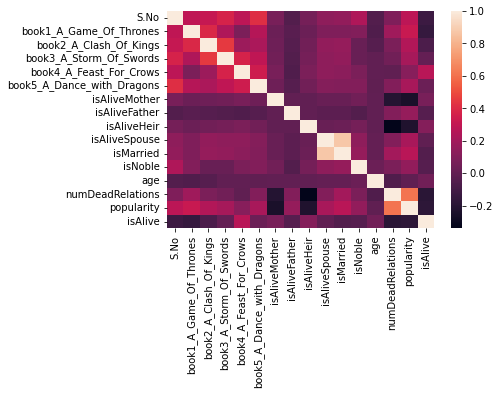

In [241]:
got_corr = got.corr(method = 'pearson').round(decimals = 2)

# instantiating a heatmap
sns.heatmap(got_corr)


# displaying the plot
plt.show()

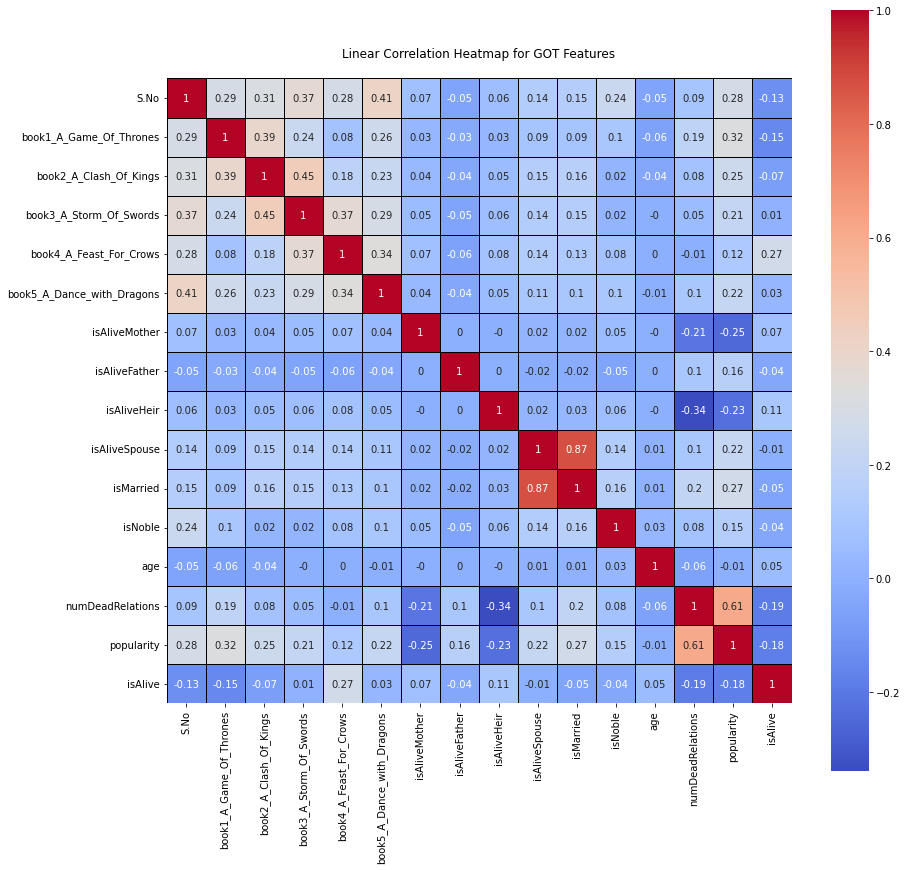

In [242]:
# specifying plot size (making it bigger)
fig, ax = plt.subplots(figsize=(14,14))


# developing a coolwarm heatmap
sns.heatmap(data       = got_corr, # the correlation matrix
            cmap       = 'coolwarm',    # changing to MEDIUM colors
            square     = True,          # tightening the layout
            annot      = True,          # should there be numbers in the heatmap
            linecolor  = 'black',       # lines between boxes
            linewidths = 0.5)           # how thick should the lines be?


# title and displaying the plot
plt.title("""
Linear Correlation Heatmap for GOT Features
""")

plt.show()

In [243]:
for column in got:
    print(f"{column}")

S.No
name
title
culture
dateOfBirth
mother
father
heir
house
spouse
book1_A_Game_Of_Thrones
book2_A_Clash_Of_Kings
book3_A_Storm_Of_Swords
book4_A_Feast_For_Crows
book5_A_Dance_with_Dragons
isAliveMother
isAliveFather
isAliveHeir
isAliveSpouse
isMarried
isNoble
age
numDeadRelations
popularity
isAlive
first_name


In [244]:
# declaring explanatory variables
got_data = got.drop({'isAlive','name' ,'culture','dateOfBirth','mother','father','heir' ,'house','spouse','first_name','title'}, axis = 1)


# declaring response variable
got_target = got.loc[ : , 'isAlive']

In [245]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = got_target) # preserving balance


# merging training data for statsmodels
got_train = pd.concat([x_train, y_train], axis = 1)

#Printing out the result.
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}


Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")

# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")



Response Variable Proportions (Training Set)
--------------------------------------------
1    0.75
0    0.25
Name: isAlive, dtype: float64


Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.74
0    0.26
Name: isAlive, dtype: float64


Training Data
-------------
X-side: (1751, 15)
y-side: (1751,)


Testing Data
------------
X-side: (195, 15)
y-side: (195,)



In [246]:
# declaring set of x-variables
x_variables = ['book1_A_Game_Of_Thrones',
                'book4_A_Feast_For_Crows',
                'numDeadRelations',
                'popularity',
                'age'
                ]

# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"{val} +")

book1_A_Game_Of_Thrones +
book4_A_Feast_For_Crows +
numDeadRelations +
popularity +
age +


User-Defined Functions

In [247]:
#running models
########################################
# optimal_neighbors
########################################
def optimal_neighbors(x_data,
                      y_data,
                      standardize = True,
                      pct_test=0.1,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
x_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the x data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing x_data
        scaler             = StandardScaler()
        scaler.fit(x_data)
        x_scaled           = scaler.transform(x_data)
        x_scaled_df        = pd.DataFrame(x_scaled)
        x_data             = x_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

Running a Logistic Regression for isAlive.

In [248]:
got_corr = got.corr(method = 'pearson').round(decimals = 2)

got_corr['isAlive'].sort_values(ascending = False)

#Maximum relation can be seen with book4_A_Feast_For_Crows 

isAlive                       1.00
book4_A_Feast_For_Crows       0.27
isAliveHeir                   0.11
isAliveMother                 0.07
age                           0.05
book5_A_Dance_with_Dragons    0.03
book3_A_Storm_Of_Swords       0.01
isAliveSpouse                -0.01
isAliveFather                -0.04
isNoble                      -0.04
isMarried                    -0.05
book2_A_Clash_Of_Kings       -0.07
S.No                         -0.13
book1_A_Game_Of_Thrones      -0.15
popularity                   -0.18
numDeadRelations             -0.19
Name: isAlive, dtype: float64

In [249]:
# value count of isAlive
got.loc[ : ,'isAlive'].value_counts(normalize = True).round(decimals = 2)

1    0.75
0    0.25
Name: isAlive, dtype: float64

 Preparing Explanatory and Response Data

In [250]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula   = """isAlive ~ book4_A_Feast_For_Crows """,
                           data = got_train)


# FITTING the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.534562
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:               Logit             Pseudo R-squared:  0.057     
Dependent Variable:  isAlive           AIC:               1876.0368 
Date:                2021-12-15 17:26  BIC:               1886.9727 
No. Observations:    1751              Log-Likelihood:    -936.02   
Df Model:            1                 LL-Null:           -992.53   
Df Residuals:        1749              LLR p-value:       2.1241e-26
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      6.0000                                         
--------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|  [0.025 0.975]
--------------------------------------------------------------------
Intercept               0.4601   0.0765  6.0172 0.0000 0.3102 0.6100
book4_A_Feast_For_Crows 1.1895   0.1141 10.4212 0.0000 0.9658 1.4132
====================================================================

"""

In [251]:
for val in got_data:
    print(f" {val} + ")

 S.No + 
 book1_A_Game_Of_Thrones + 
 book2_A_Clash_Of_Kings + 
 book3_A_Storm_Of_Swords + 
 book4_A_Feast_For_Crows + 
 book5_A_Dance_with_Dragons + 
 isAliveMother + 
 isAliveFather + 
 isAliveHeir + 
 isAliveSpouse + 
 isMarried + 
 isNoble + 
 age + 
 numDeadRelations + 
 popularity + 


In [252]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """ isAlive ~ 
 book2_A_Clash_Of_Kings + 
 book4_A_Feast_For_Crows + 
 age + 
 numDeadRelations + 
 popularity """, data    = got_train)

# fitting the model object
results_full = logistic_full.fit()

# checking the results SUMMARY
results_full.summary2()

Optimization terminated successfully.
         Current function value: 0.506066
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                Logit              Pseudo R-squared:   0.107     
Dependent Variable:   isAlive            AIC:                1784.2422 
Date:                 2021-12-15 17:26   BIC:                1817.0498 
No. Observations:     1751               Log-Likelihood:     -886.12   
Df Model:             5                  LL-Null:            -992.53   
Df Residuals:         1745               LLR p-value:        5.1099e-44
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       9.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept                0.7606   0.0872  8.7200 0.0000  0.5897  0.9316
book2_A_Clash_Of_Kings  -0.4962   0.1267 -3.9166 0.0001 -0.7444 -0.2479
book4_A_Feast_For_Crows  1.4404   0.1253 11.4952 0.0000  1.1948  1.6860
age                      0.0000   0.0001  0.4365 0.6625 -0.0001  0.0001
numDeadRelations        -0.1367   0.0505 -2.7076 0.0068 -0.2356 -0.0377
popularity              -1.8466   0.4342 -4.2527 0.0000 -2.6977 -0.9956
=======================================================================

"""

In [253]:
# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full'   : ['book4_A_Feast_For_Crows', 'book2_A_Clash_Of_Kings', 'isAliveFather', 'book1_A_Game_Of_Thrones','isNoble', 'age', 'popularity',
                   'numDeadRelations'],
 

 # significant variables only (set 1)
 'logit_sig'    : ['book4_A_Feast_For_Crows' , 'book2_A_Clash_Of_Kings', 'age', 'popularity',
                   'numDeadRelations'],
    
    
 # significant variables only (set 2)
 'logit_sig_2'  : ['book4_A_Feast_For_Crows', 'popularity', 'numDeadRelations',
                   'isNoble', 'book1_A_Game_Of_Thrones']

}

In [254]:
# printing candidate variable sets
print(f"""
/--------------------------\\
|Explanatory Variable Sets |
\\--------------------------/

Full Model:
-----------
{candidate_dict['logit_full']}


First Significant p-value Model:
--------------------------------
{candidate_dict['logit_sig']}


Second Significant p-value Model:
---------------------------------
{candidate_dict['logit_sig_2']}
""")


/--------------------------\
|Explanatory Variable Sets |
\--------------------------/

Full Model:
-----------
['book4_A_Feast_For_Crows', 'book2_A_Clash_Of_Kings', 'isAliveFather', 'book1_A_Game_Of_Thrones', 'isNoble', 'age', 'popularity', 'numDeadRelations']


First Significant p-value Model:
--------------------------------
['book4_A_Feast_For_Crows', 'book2_A_Clash_Of_Kings', 'age', 'popularity', 'numDeadRelations']


Second Significant p-value Model:
---------------------------------
['book4_A_Feast_For_Crows', 'popularity', 'numDeadRelations', 'isNoble', 'book1_A_Game_Of_Thrones']



In [255]:
# train/test split with the full model
got_data   =  got.loc[ : , candidate_dict['logit_sig']]
got_target =  got.loc[ : , 'isAlive']


# This is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = got_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))


# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4) # accuracy

Training ACCURACY: 0.7613
Testing  ACCURACY: 0.7795


In [256]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[  9  41]
 [  2 143]]


In [257]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 9
False Positives: 41
False Negatives: 2
True Positives : 143



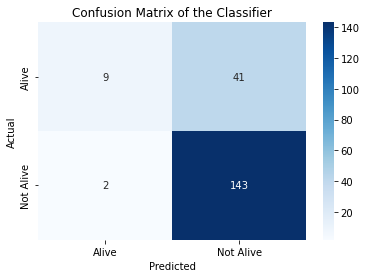

In [258]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = logreg_pred,
          labels = ['Alive', 'Not Alive'])

In [259]:
# area under the roc curve (auc)
print(roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

0.5831


In [260]:
# zipping each feature name to its coefficient
logreg_model_values = zip(got[candidate_dict['logit_sig_2']].columns,
                          logreg_fit.coef_.ravel().round(decimals = 2))


# setting up a placeholder list to store model features
logreg_model_lst = [('intercept', logreg_fit.intercept_[0].round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in logreg_model_values:
    logreg_model_lst.append(val)
    

# checking the results
for pair in logreg_model_lst:
    print(pair)

('intercept', 0.76)
('book4_A_Feast_For_Crows', 1.4)
('popularity', -0.5)
('numDeadRelations', 0.0)
('isNoble', -1.55)
('book1_A_Game_Of_Thrones', -0.16)


Modelling CART models

In [261]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [262]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 0.8761
Full Tree Testing ACCURACY : 0.7795
Full Tree AUC Score: 0.6814


In [263]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}

""")



True Negatives : 24
False Positives: 26
False Negatives: 17
True Positives : 128




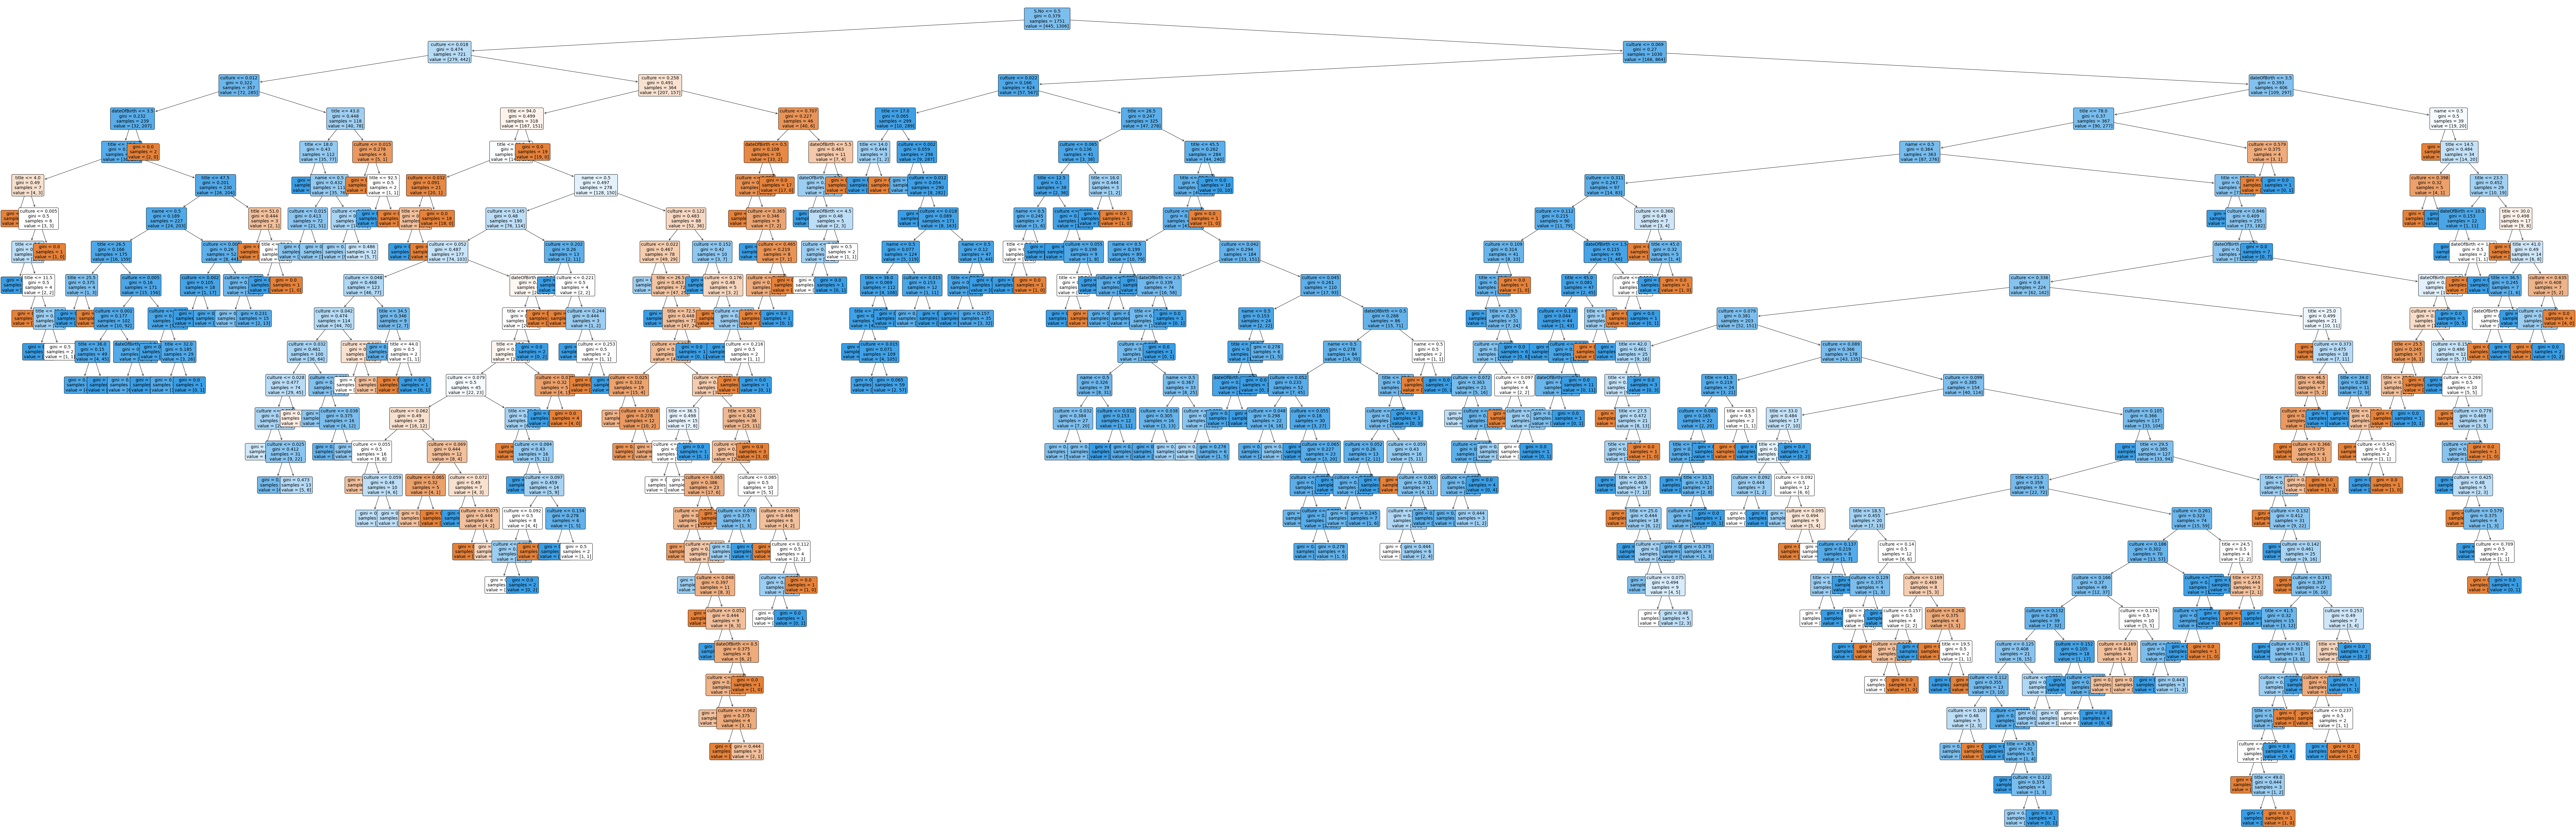

In [264]:
# setting figure size
plt.figure(figsize=(150,50))


# developing a plotted tree
plot_tree(decision_tree = full_tree_fit, 
          feature_names = got.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

In [265]:
# INSTANTIATING a classification tree object
pruned_tree = DecisionTreeClassifier(max_depth = 8,
                                     min_samples_leaf = 25,
                                     random_state = 219)


# FITTING the training data
pruned_tree_fit  = pruned_tree.fit(x_train, y_train)


# PREDICTING on new data
pruned_tree_pred = pruned_tree_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', pruned_tree_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', pruned_tree_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = pruned_tree_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = pruned_tree_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = pruned_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = pruned_tree_pred).round(4) # auc

Training ACCURACY: 0.7921
Testing  ACCURACY: 0.8154
AUC Score        : 0.6859


In [266]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = pruned_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 21
False Positives: 29
False Negatives: 7
True Positives : 138



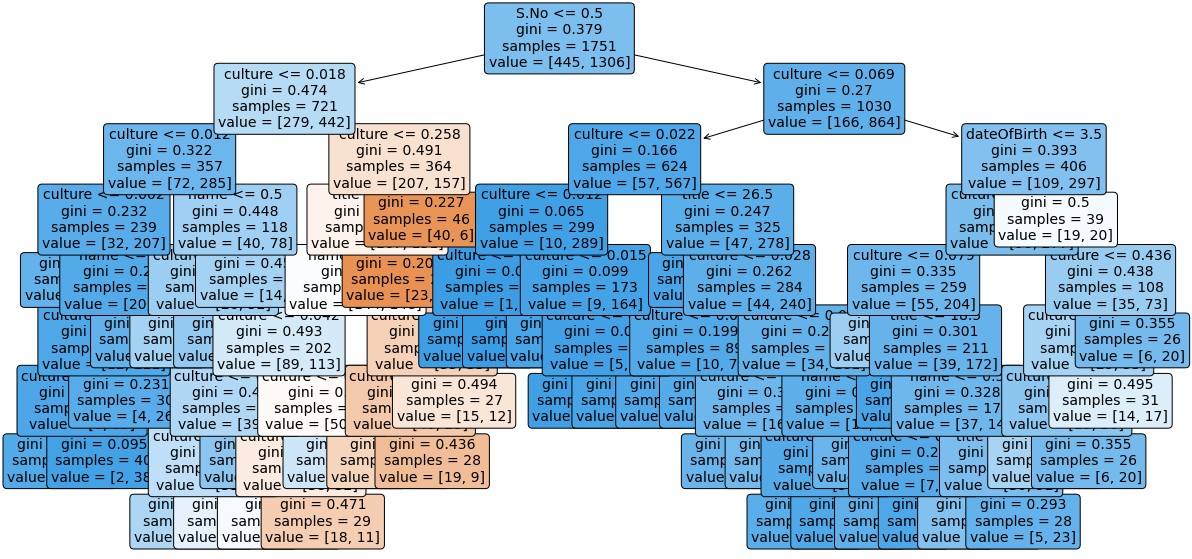

In [267]:
# setting figure size
plt.figure(figsize=(20, 10)) # adjusting to better fit the visual


# developing a plotted tree
plot_tree(decision_tree = pruned_tree_fit, # changing to pruned_tree_fit
          feature_names = got.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

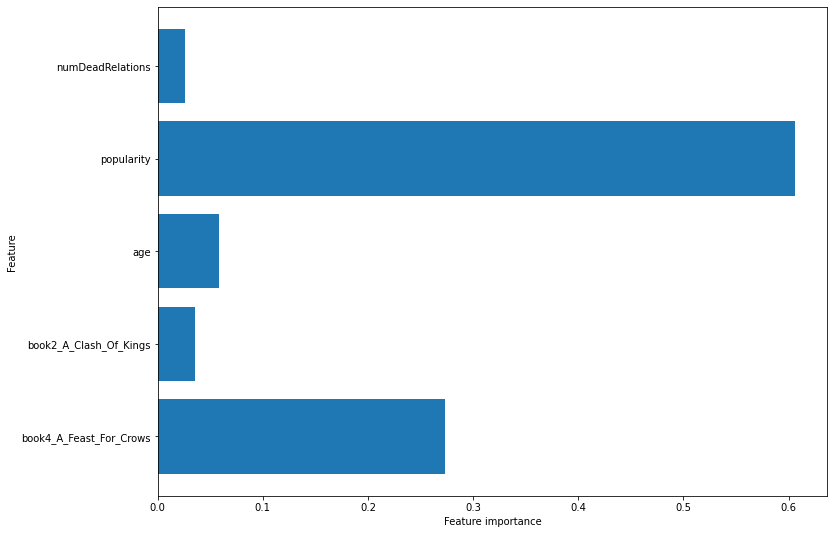

In [268]:
# plotting feature importance
plot_feature_importances(pruned_tree_fit,
                         train = x_train,
                         export = False)

In [269]:
# comparing results
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      {logreg_auc_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Full Tree     {full_tree_auc_score}         {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree   {pruned_tree_auc_score}         {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree', 'Pruned Tree'],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score, pruned_tree_auc_score],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score,
                           pruned_tree_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score,
                           pruned_tree_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp)]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('../Sessions 5-7 (Classification Modeling)/path_practice/__results/classification_model_performance_new.xlsx',
                          index = False)


Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      0.5831         (9, 41, 2, 143)
Full Tree     0.6814         (24, 26, 17, 128)
Pruned Tree   0.6859         (21, 29, 7, 138)



CLASSIFICATION BASED ON KNN 

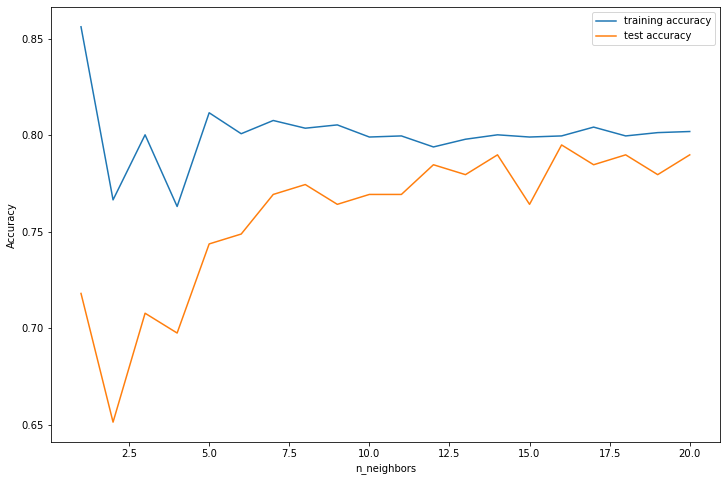

The optimal number of neighbors is: 16


In [270]:
# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(x_data        = got_data,
                                  y_data        = got_target,
                                  response_type = 'class')

Scaling the explanatory data

In [271]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(got_data)


# TRANSFORMING the data
x_scaled     = scaler.transform(got_data)


# converting to a DataFrame
x_scaled_df  = pd.DataFrame(x_scaled) 


# train-test split with the scaled data
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            x_scaled_df,
            got_target,
            random_state = 219,
            test_size    = 0.1,
            stratify     = got_target)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# FITTING the training data
knn_fit = knn_opt.fit(x_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(x_test_scaled)


# SCORING the results
print('Training ACCURACY:', knn_fit.score(x_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(x_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))


# saving scoring data
knn_train_score = knn_fit.score(x_train_scaled, y_train_scaled).round(4)
knn_test_score  = knn_fit.score(x_test_scaled, y_test_scaled).round(4)


# saving AUC score
knn_auc_score   = roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4)

Training ACCURACY: 0.7921
Testing  ACCURACY: 0.8256
AUC Score        : 0.719


Building a KNN classification model

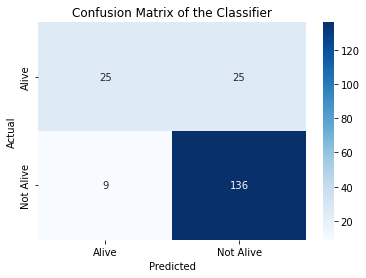

In [272]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = knn_pred,
          labels = ['Alive', 'Not Alive'])

In [273]:
# unpacking the confusion matrix
knn_tree_tn, \
knn_tree_fp, \
knn_tree_fn, \
knn_tree_tp = confusion_matrix(y_true = y_test, y_pred = knn_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 21
False Positives: 29
False Negatives: 7
True Positives : 138



In [274]:
# declaring model performance objects for knn
knn_train_score = knn_fit.score(x_train_scaled, y_train_scaled).round(4)
knn_test_score  = knn_fit.score(x_test_scaled, y_test_scaled).round(4)
knn_auc_score   = roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'KNN',
                           'Training Accuracy' : knn_train_score,
                           'Testing Accuracy'  : knn_test_score,
                           'AUC Score'         : knn_auc_score,
                           'Confusion Matrix'  : (knn_tree_tn,
                                                  knn_tree_fp,
                                                  knn_tree_fn,
                                                  knn_tree_tp)},
                           ignore_index = True)


model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('../Sessions 5-7 (Classification Modeling)/path_practice/__results/classification_model_performance_new.xlsx',
                          index = False)

In [275]:
# loading model performance
model_performance = pd.read_excel('../Sessions 5-7 (Classification Modeling)/path_practice/__results/classification_model_performance_new.xlsx')


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


########################################
# explanatory variable sets
########################################
candidate_dict = {

 # full model
 'logit_full'   : ['book4_A_Feast_For_Crows', 'book2_A_Clash_Of_Kings', 'book1_A_Game_Of_Thrones','isNoble', 'gender_guesser_male', 'age', 'popularity',
                   'numDeadRelations', 'isAliveFather', 'gender_guesser_female',
                   'gender_guesser_unknown'],
 

 # significant variables only (set 1)
 'logit_sig'    : ['book4_A_Feast_For_Crows' , 'book2_A_Clash_Of_Kings', 'age', 'popularity',
                   'numDeadRelations', 'gender_guesser_male'],
    
    
 # significant variables only (set 2)
 'logit_sig_2'  : ['book4_A_Feast_For_Crows', 'popularity', 'numDeadRelations',
                   'isNoble', 'book1_A_Game_Of_Thrones', 'gender_guesser_male']
    
}


########################################
# checking previous model performances
########################################
model_performance

Model Name  AUC Score  Training Accuracy  Testing Accuracy   Confusion Matrix
0     Logistic     0.5831             0.7613            0.7795    (9, 41, 2, 143)
1    Full Tree     0.6814             0.8761            0.7795  (24, 26, 17, 128)
2  Pruned Tree     0.6859             0.7921            0.8154   (21, 29, 7, 138)
3          KNN     0.7190             0.7921            0.8256   (25, 25, 9, 136)

Performing Logistic Regression with Hyperparameters

In [276]:
# INSTANTIATING a logistic regression model with default values
lr_default = LogisticRegression(solver = 'lbfgs',
                                C = 1.0,
                                warm_start = False,
                                random_state = 219)

In [277]:
# FITTING the training data
lr_default_fit = lr_default.fit(x_train, y_train)


# PREDICTING based on the testing set
lr_default_pred = lr_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', lr_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', lr_default_fit.score(x_test, y_test).round(4))


# SCORING with AUC
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_default_pred).round(4))


# saving scoring data for future use
logreg_train_score = lr_default_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = lr_default_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC score
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = lr_default_pred).round(4)

Training ACCURACY: 0.7613
Testing  ACCURACY: 0.7795
AUC Score        : 0.5831


Hyperparameter Tuning with RandomizedSearchCV

In [278]:
# new packages
from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer  
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm# customizable scorer

In [279]:
########################################
# RandomizedSearchCV
########################################

# declaring a hyperparameter space
C_range          = np.arange(0.1, 5.0, 0.1)
warm_start_range = [True, False]
solver_range     = ['newton-cg', 'sag', 'lbfgs']


# creating a hyperparameter grid
param_grid = {'C'          : C_range,
              'warm_start' : warm_start_range,
              'solver'     : solver_range}


# INSTANTIATING the model object without hyperparameters
lr_tuned = LogisticRegression(random_state = 219,
                              max_iter     = 1000) # increased for convergence


# GridSearchCV object
lr_tuned_cv = RandomizedSearchCV(estimator           = lr_tuned,   # the model object
                                 param_distributions = param_grid, # parameters to tune
                                 cv                  = 3,          # how many folds in cross-validation
                                 n_iter              = 250,        # number of combinations of hyperparameters to try
                                 random_state        = 219,        # starting point for random sequence
                                 scoring = make_scorer(
                                           roc_auc_score,
                                           needs_threshold = False)) # scoring criteria (AUC)


# FITTING to the FULL DATASET (due to cross-validation)
lr_tuned_cv.fit(got_data, got_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", lr_tuned_cv.best_params_)
print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

C:\Users\kruta\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kruta\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kruta\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kruta\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kruta\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kruta\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

C:\Users\kruta\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kruta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kruta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please als

C:\Users\kruta\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kruta\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kruta\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kruta\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kruta\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kruta\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

C:\Users\kruta\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kruta\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kruta\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kruta\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kruta\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kruta\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

C:\Users\kruta\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kruta\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kruta\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kruta\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kruta\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kruta\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

C:\Users\kruta\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kruta\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kruta\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kruta\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kruta\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kruta\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

Tuned Parameters  : {'warm_start': False, 'solver': 'lbfgs', 'C': 4.8}
Tuned CV AUC      : 0.5775


C:\Users\kruta\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [280]:
lr_tuned_cv.cv_results_

{'mean_fit_time': array([0.11137064, 0.03239703, 0.01723655, 0.02293499, 0.11727031,
        0.03191312, 0.11310975, 0.01706131, 0.11430558, 0.10001016,
        0.02566353, 0.02572362, 0.02446485, 0.11234419, 0.02897342,
        0.11333187, 0.02572544, 0.02987242, 0.11371128, 0.03086114,
        0.03966506, 0.02551087, 0.03136794, 0.11635621, 0.03442709,
        0.1172835 , 0.10336971, 0.0231212 , 0.11576915, 0.03127861,
        0.11316562, 0.02374132, 0.02591244, 0.0254972 , 0.03301779,
        0.03259587, 0.03015248, 0.03369498, 0.11744777, 0.02206373,
        0.02718115, 0.01557906, 0.10443544, 0.10840472, 0.02886868,
        0.02971085, 0.02431671, 0.01837691, 0.11906767, 0.02554901,
        0.02166867, 0.11328506, 0.10030119, 0.10008685, 0.03080606,
        0.11671774, 0.02892979, 0.12061588, 0.02766228, 0.02954141,
        0.03110258, 0.11454614, 0.1057423 , 0.02048914, 0.1179932 ,
        0.03238114, 0.02929282, 0.11629788, 0.02817074, 0.02171993,
        0.03296351, 0.02850175,

In [281]:
lr_tuned_cv.best_estimator_

LogisticRegression(C=4.8, max_iter=1000, random_state=219)

In [282]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
lr_tuned = LogisticRegression(C            = 4.8,
                              warm_start   = False,
                              solver       = 'lbfgs',
                              max_iter     = 1000,
                              random_state = 219)


# FITTING the model to the full dataset
lr_tuned.fit(got_data, got_target) # this is ok because already tuned


# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned.predict(x_test)


# SCORING the results
print('LR Tuned Training ACCURACY:', lr_tuned.score(x_train, y_train).round(4))
print('LR Tuned Testing  ACCURACY:', lr_tuned.score(x_test, y_test).round(4))
print('LR Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_tuned_pred).round(4))


# saving scoring data for future use
lr_tuned_train_score = lr_tuned.score(x_train, y_train).round(4) # accuracy
lr_tuned_test_score  = lr_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
lr_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = lr_tuned_pred).round(4) # auc

LR Tuned Training ACCURACY: 0.7607
LR Tuned Testing  ACCURACY: 0.7897
LR Tuned AUC Score        : 0.5966


In [283]:
# unpacking the confusion matrix
lr_tuned_tn, \
lr_tuned_fp, \
lr_tuned_fn, \
lr_tuned_tp = confusion_matrix(y_true = y_test, y_pred = lr_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {lr_tuned_tn}
False Positives: {lr_tuned_fp}
False Negatives: {lr_tuned_fn}
True Positives : {lr_tuned_tp}
""")


True Negatives : 10
False Positives: 40
False Negatives: 1
True Positives : 144



In [284]:
# loading model performance
model_performance = pd.read_excel('../Sessions 5-7 (Classification Modeling)/path_practice/__results/classification_model_performance_new.xlsx')


# declaring model performance objects
lr_train_acc = lr_tuned.score(x_train, y_train).round(4)
lr_test_acc  = lr_tuned.score(x_test, y_test).round(4)
lr_auc       = roc_auc_score(y_true  = y_test,
                             y_score = lr_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned LR',
                           'Training Accuracy' : lr_train_acc,
                           'Testing Accuracy'  : lr_test_acc,
                           'AUC Score'         : lr_auc,
                           'Confusion Matrix'  : (lr_tuned_tn,
                                                  lr_tuned_fp,
                                                  lr_tuned_fn,
                                                  lr_tuned_tp)},
                           ignore_index = True)


# checking the results
model_performance

Model Name  AUC Score  Training Accuracy  Testing Accuracy   Confusion Matrix
0     Logistic     0.5831             0.7613            0.7795    (9, 41, 2, 143)
1    Full Tree     0.6814             0.8761            0.7795  (24, 26, 17, 128)
2  Pruned Tree     0.6859             0.7921            0.8154   (21, 29, 7, 138)
3          KNN     0.7190             0.7921            0.8256   (25, 25, 9, 136)
4     Tuned LR     0.5966             0.7607            0.7897   (10, 40, 1, 144)

Hyperparameter Tuning on Classification Trees

In [285]:
# declaring a hyperparameter space
criterion_range = ['gini', 'entropy']
splitter_range  = ['best', 'random']
depth_range     = np.arange(1, 25, 1)
leaf_range      = np.arange(1, 100, 1)


# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_range,
              'splitter'         : splitter_range,
              'max_depth'        : depth_range,
              'min_samples_leaf' : leaf_range}


# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeClassifier(random_state = 219)


# RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   param_distributions   = param_grid,
                                   cv                    = 3,
                                   n_iter                = 1000,
                                   random_state          = 219,
                                   scoring = make_scorer(roc_auc_score,
                                             needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(got_data, got_target)


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

Tuned Parameters  : {'splitter': 'random', 'min_samples_leaf': 3, 'max_depth': 4, 'criterion': 'gini'}
Tuned Training AUC: 0.6993


Build a classification tree model based on the hyperparameter tuning results.

In [286]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
tree_tuned = DecisionTreeClassifier(splitter         = 'random',
                                    min_samples_leaf = 3,
                                    max_depth        = 4,
                                    criterion        = 'gini',
                                    random_state     = 219)


# FITTING to the FULL DATASET (due to cross-validation)
tree_tuned_fit = tree_tuned.fit(got_data, got_target)


# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', tree_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))


# saving scoring data for future use
tree_tuned_train_score = tree_tuned.score(x_train, y_train).round(4) # accuracy
tree_tuned_test_score  = tree_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
tree_tuned_auc         = roc_auc_score(y_true  = y_test,
                                       y_score = tree_tuned_pred).round(4) # auc

Training ACCURACY: 0.7698
Testing  ACCURACY: 0.8462
AUC Score        : 0.7852


In [287]:
# unpacking the confusion matrix
tuned_tree_tn, \
tuned_tree_fp, \
tuned_tree_fn, \
tuned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_tree_tn}
False Positives: {tuned_tree_fp}
False Negatives: {tuned_tree_fn}
True Positives : {tuned_tree_tp}
""")


True Negatives : 33
False Positives: 17
False Negatives: 13
True Positives : 132



In [288]:
# declaring model performance objects
tree_train_acc = tree_tuned.score(x_train, y_train).round(4)
tree_test_acc  = tree_tuned.score(x_test, y_test).round(4)
tree_auc       = roc_auc_score(y_true  = y_test,
                              y_score = tree_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned Tree',
                           'Training Accuracy' : tree_train_acc,
                           'Testing Accuracy'  : tree_test_acc,
                           'AUC Score'         : tree_auc,
                           'Confusion Matrix'  : (tuned_tree_tn,
                                                  tuned_tree_fp,
                                                  tuned_tree_fn,
                                                  tuned_tree_tp)},
                           ignore_index = True)


# checking the results
model_performance

Model Name  AUC Score  Training Accuracy  Testing Accuracy   Confusion Matrix
0     Logistic     0.5831             0.7613            0.7795    (9, 41, 2, 143)
1    Full Tree     0.6814             0.8761            0.7795  (24, 26, 17, 128)
2  Pruned Tree     0.6859             0.7921            0.8154   (21, 29, 7, 138)
3          KNN     0.7190             0.7921            0.8256   (25, 25, 9, 136)
4     Tuned LR     0.5966             0.7607            0.7897   (10, 40, 1, 144)
5   Tuned Tree     0.7852             0.7698            0.8462  (33, 17, 13, 132)

Building Randon Forest Models

In [289]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 350,
                                    criterion        = 'entropy',
                                    min_samples_leaf = 8,
                                    warm_start       = False,
                                    random_state     = 219)

In [290]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(4))


# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

Training ACCURACY: 0.8058
Testing  ACCURACY: 0.8308
AUC Score        : 0.7028


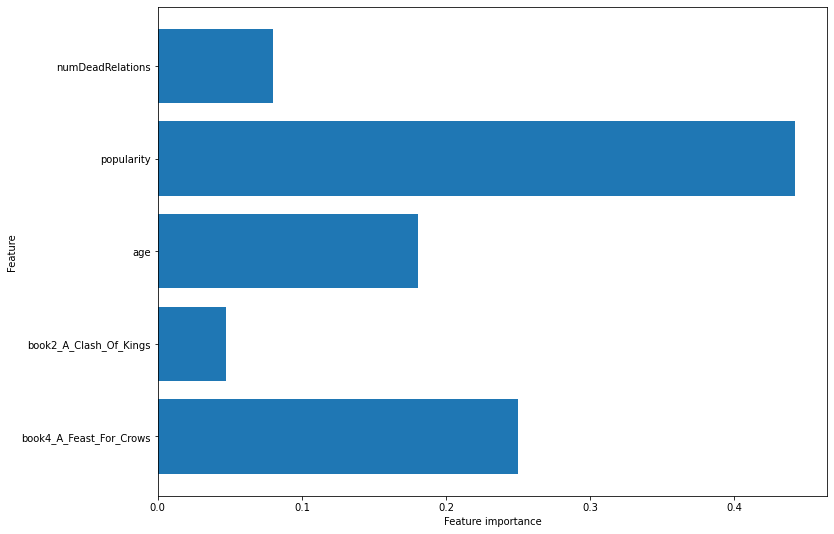

In [291]:
plot_feature_importances(rf_default_fit,x_train,export= False)

In [292]:
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 22
False Positives: 28
False Negatives: 5
True Positives : 140



In [293]:
# declaring model performance objects
rf_train_acc = rf_default_fit.score(x_train, y_train).round(4)
rf_test_acc  = rf_default_fit.score(x_test, y_test).round(4)
rf_auc       = roc_auc_score(y_true  = y_test,
                             y_score = rf_default_fit_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Random Forest (Full)',
                           'Training Accuracy'  : rf_train_acc,
                           'Testing Accuracy'   : rf_test_acc,
                           'AUC Score'          : rf_auc,
                           'Confusion Matrix'   : (rf_tn,
                                                   rf_fp,
                                                   rf_fn,
                                                   rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

Model Name  AUC Score  Training Accuracy  Testing Accuracy   Confusion Matrix
0              Logistic     0.5831             0.7613            0.7795    (9, 41, 2, 143)
1             Full Tree     0.6814             0.8761            0.7795  (24, 26, 17, 128)
2           Pruned Tree     0.6859             0.7921            0.8154   (21, 29, 7, 138)
3                   KNN     0.7190             0.7921            0.8256   (25, 25, 9, 136)
4              Tuned LR     0.5966             0.7607            0.7897   (10, 40, 1, 144)
5            Tuned Tree     0.7852             0.7698            0.8462  (33, 17, 13, 132)
6  Random Forest (Full)     0.7028             0.8058            0.8308   (22, 28, 5, 140)

Random Forest Tuning

In [296]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# declaring a hyperparameter space
estimator_range  = np.arange(100, 1100, 250)
leaf_range       = np.arange(1, 31, 10)
criterion_range  = ['gini', 'entropy']
bootstrap_range  = [True, False]
warm_start_range = [True, False]


# creating a hyperparameter grid
param_grid = {'n_estimators'     : estimator_range,
              'min_samples_leaf' : leaf_range,
              'criterion'        : criterion_range,
              'bootstrap'        : bootstrap_range,
              'warm_start'       : warm_start_range}


# INSTANTIATING the model object without hyperparameters
forest_grid = RandomForestClassifier(random_state = 219)


# GridSearchCV object
forest_cv = RandomizedSearchCV(estimator           = forest_grid,
                               param_distributions = param_grid,
                               cv         = 3,
                               n_iter     = 1000,
                               scoring    = make_scorer(roc_auc_score,
                                            needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
forest_cv.fit(got_data, got_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", forest_cv.best_params_)
print("Tuned Training AUC:", forest_cv.best_score_.round(4))

C:\Users\kruta\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 96 is smaller than n_iter=1000. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuned Parameters  : {'warm_start': True, 'n_estimators': 100, 'min_samples_leaf': 11, 'criterion': 'gini', 'bootstrap': False}
Tuned Training AUC: 0.6526


In [297]:
forest_cv.best_estimator_

RandomForestClassifier(bootstrap=False, min_samples_leaf=11, random_state=219,
                       warm_start=True)

In [298]:
# INSTANTIATING a random forest model with default values




forest_tuned = RandomForestClassifier(criterion        = 'entropy',
                                      min_samples_leaf = 11,
                                      n_estimators     = 100,
                                      warm_start       = True,
                                      bootstrap        = False,
                                      random_state     = 219)


# FITTING to the FULL DATASET (due to cross-validation)
forest_tuned_fit = forest_tuned.fit(got_data, got_target)


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned_fit.predict(x_test)

# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(x_train, y_train).round(4))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(x_test, y_test).round(4))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                       y_score = forest_tuned_pred).round(4))

# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(x_train, y_train).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(4) # auc

Forest Tuned Training ACCURACY: 0.8081
Forest Tuned Testing  ACCURACY: 0.8615
Forest Tuned AUC Score        : 0.7628


In [299]:
# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")


True Negatives : 28
False Positives: 22
False Negatives: 5
True Positives : 140



In [300]:
# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Random Forest (Tuned)',
                           'Training Accuracy'  : forest_tuned_train_score,
                           'Testing Accuracy'   : forest_tuned_test_score,
                           'AUC Score'          : forest_tuned_auc,
                           'Confusion Matrix'   : (tuned_rf_tn,
                                                   tuned_rf_fp,
                                                   tuned_rf_fn,
                                                   tuned_rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

Model Name  AUC Score  Training Accuracy  Testing Accuracy   Confusion Matrix
0               Logistic     0.5831             0.7613            0.7795    (9, 41, 2, 143)
1              Full Tree     0.6814             0.8761            0.7795  (24, 26, 17, 128)
2            Pruned Tree     0.6859             0.7921            0.8154   (21, 29, 7, 138)
3                    KNN     0.7190             0.7921            0.8256   (25, 25, 9, 136)
4               Tuned LR     0.5966             0.7607            0.7897   (10, 40, 1, 144)
5             Tuned Tree     0.7852             0.7698            0.8462  (33, 17, 13, 132)
6   Random Forest (Full)     0.7028             0.8058            0.8308   (22, 28, 5, 140)
7  Random Forest (Tuned)     0.7628             0.8081            0.8615   (28, 22, 5, 140)

In [301]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

In [302]:
# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 3,
                                              warm_start    = False,
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(x_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(x_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))

Training ACCURACY: 0.8252
Testing ACCURACY : 0.8256
AUC Score        : 0.7059


In [303]:
# unpacking the confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_default_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")


True Negatives : 23
False Positives: 27
False Negatives: 7
True Positives : 138



In [304]:
# declaring model performance objects
gbm_train_acc = full_gbm_default_fit.score(x_train, y_train).round(4)
gbm_test_acc  = full_gbm_default_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = full_gbm_default_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'       : 'GBM (Full)',
                          'Training Accuracy' : gbm_train_acc,
                          'Testing Accuracy'  : gbm_test_acc,
                          'AUC Score'         : gbm_auc,
                          'Confusion Matrix'  : (gbm_default_tn,
                                                 gbm_default_fp,
                                                 gbm_default_fn,
                                                 gbm_default_tp)},
                          ignore_index = True)


# checking the results
model_performance

Model Name  AUC Score  Training Accuracy  Testing Accuracy   Confusion Matrix
0               Logistic     0.5831             0.7613            0.7795    (9, 41, 2, 143)
1              Full Tree     0.6814             0.8761            0.7795  (24, 26, 17, 128)
2            Pruned Tree     0.6859             0.7921            0.8154   (21, 29, 7, 138)
3                    KNN     0.7190             0.7921            0.8256   (25, 25, 9, 136)
4               Tuned LR     0.5966             0.7607            0.7897   (10, 40, 1, 144)
5             Tuned Tree     0.7852             0.7698            0.8462  (33, 17, 13, 132)
6   Random Forest (Full)     0.7028             0.8058            0.8308   (22, 28, 5, 140)
7  Random Forest (Tuned)     0.7628             0.8081            0.8615   (28, 22, 5, 140)
8             GBM (Full)     0.7059             0.8252            0.8256   (23, 27, 7, 138)

Final Results

In [307]:
# comparing results

print(f"""

Model                 Train Accu  Test Accu  AUC score    TP     TN    FP  FN

-----                 ----------  ---------  ----------   --     --    --  --

Tuned Tree  {tree_train_acc}      {tree_test_acc}     {tree_auc}          {tuned_tree_tp}    {tuned_tree_tn}    {tuned_tree_fp}   {tuned_tree_fn}

this is the selected model

""")



Model                 Train Accu  Test Accu  AUC score    TP     TN    FP  FN

-----                 ----------  ---------  ----------   --     --    --  --

Tuned Tree  0.7698      0.8462     0.7852          132    33    17   13

this is the selected model


